In [230]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [231]:
# importing sleep data 
df = pd.read_csv('sleepdata.csv', sep=';')
df.head()

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2017-12-24 02:35:57,2017-12-24 11:05:51,78%,0%,NaN,0,0,Normal,101.0,NaN,...,30594.2,27024.8,611.9,2017-12-25 01:10:00,2017-12-25 01:30:00,True,0.0,0.0,No weather,NaN
1,2017-12-25 04:10:42,2017-12-25 12:16:24,93%,0%,NaN,0,0,Normal,101.1,NaN,...,29142.5,25839.6,582.8,2017-12-26 13:40:00,2017-12-26 14:00:00,True,0.0,0.0,No weather,NaN
2,2017-12-26 05:56:12,2017-12-26 11:20:23,54%,78%,NaN,0,0,Normal,101.4,NaN,...,19451.3,16209.4,389.0,2017-12-27 01:00:00,2017-12-27 01:20:00,True,0.0,0.0,No weather,NaN
3,2017-12-27 02:54:12,2017-12-27 10:30:39,93%,73%,NaN,0,0,Normal,102.0,NaN,...,27387.0,23644.1,547.7,2017-12-28 00:10:00,2017-12-28 00:30:00,True,0.0,0.0,No weather,NaN
4,2017-12-28 03:41:00,2017-12-28 11:50:55,68%,76%,NaN,0,0,No alarm,102.2,NaN,...,29395.2,23320.2,587.9,NaN,NaN,True,0.0,0.0,No weather,NaN


Initial Data Cleaning

In [232]:
# dropping mood and notes column as it wasn't consistent throughout the years and subject to subjectivity 
df = df.drop(['Notes','Mood'],axis=1)

# converting time in bed, time asleep and time before sleep into hours instead of seconds 
df['Time in bed (hours)'] = (df['Time in bed (seconds)'] / 3600).round(2)
df['Time asleep (hours)'] = (df['Time asleep (seconds)'] / 3600).round(2)
df['Time before sleep (hours)'] = (df['Time before sleep (seconds)'] / 3600).round(2)

# dropping time in bed, time asleep and time before sleep in seconds columns 
df = df.drop(['Time in bed (seconds)','Time asleep (seconds)','Time before sleep (seconds)'],axis=1)
df.head()

,Start,End,Sleep Quality,Regularity,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,Movements per hour,Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Time in bed (hours),Time asleep (hours),Time before sleep (hours)
0,2017-12-24 02:35:57,2017-12-24 11:05:51,78%,0%,0,0,Normal,101.0,NaN,128.6,2017-12-25 01:10:00,2017-12-25 01:30:00,True,0.0,0.0,No weather,8.50,7.51,0.17
1,2017-12-25 04:10:42,2017-12-25 12:16:24,93%,0%,0,0,Normal,101.1,NaN,117.1,2017-12-26 13:40:00,2017-12-26 14:00:00,True,0.0,0.0,No weather,8.10,7.18,0.16
2,2017-12-26 05:56:12,2017-12-26 11:20:23,54%,78%,0,0,Normal,101.4,NaN,124.3,2017-12-27 01:00:00,2017-12-27 01:20:00,True,0.0,0.0,No weather,5.40,4.50,0.11
3,2017-12-27 02:54:12,2017-12-27 10:30:39,93%,73%,0,0,Normal,102.0,NaN,98.3,2017-12-28 00:10:00,2017-12-28 00:30:00,True,0.0,0.0,No weather,7.61,6.57,0.15
4,2017-12-28 03:41:00,2017-12-28 11:50:55,68%,76%,0,0,No alarm,102.2,NaN,150.8,NaN,NaN,True,0.0,0.0,No weather,8.17,6.48,0.16


In [233]:
# Data exploration amongst different columns 
df.describe()

,Heart rate (bpm),Steps,Air Pressure (Pa),Movements per hour,Snore time,Weather temperature (°C),Time in bed (hours),Time asleep (hours),Time before sleep (hours)
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,18.063231,3575.424548,87.212593,285.391817,220.670988,6.326089,7.023204,5.981026,0.258948
std,32.827060,4620.741035,34.232736,1360.583681,559.423967,9.865047,2.285871,2.207177,0.273124
min,0.000000,0.000000,0.000000,0.000000,0.000000,-19.500000,0.260000,0.000000,0.000000
25%,0.000000,0.000000,99.600000,74.800000,0.000000,0.000000,6.090000,5.060000,0.130000
50%,0.000000,0.000000,100.400000,121.700000,0.000000,1.800000,7.360000,6.245000,0.160000
75%,0.000000,7099.500000,101.300000,215.825000,240.000000,14.200000,8.490000,7.390000,0.210000
max,113.000000,23497.000000,103.000000,27331.700000,8508.700000,33.800000,14.550000,12.900000,1.830000


In [234]:
# dropping rows with 0 in heart rate, steps, air pressure, movements per hour as it means that it wasn't 
# properly recorded 

columns_to_drop = ['Heart rate (bpm)', 'Steps','Movements per hour']
df_no_zeros = df[~(df[columns_to_drop] == 0).any(axis=1)]
df_no_zeros.head()

,Start,End,Sleep Quality,Regularity,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,Movements per hour,Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Time in bed (hours),Time asleep (hours),Time before sleep (hours)
1157,2022-10-18 14:07:34,2022-10-18 19:16:44,55%,0%,75,14097,Normal,0.0,NaN,618.4,NaN,NaN,False,0.0,0.0,No weather,5.15,4.23,0.10
1158,2022-10-19 03:20:25,2022-10-19 07:02:34,40%,-88%,92,14769,Normal,0.0,NaN,1636.3,NaN,NaN,False,0.0,0.0,No weather,3.70,3.26,0.07
1162,2022-10-22 18:24:43,2022-10-23 02:56:30,81%,72%,92,12037,Normal,0.0,NaN,2902.4,NaN,NaN,False,0.0,0.0,No weather,8.53,7.36,0.17
1163,2022-10-22 18:24:43,2022-10-23 02:56:30,81%,72%,92,12037,Normal,0.0,NaN,2902.4,NaN,NaN,False,0.0,0.0,No weather,8.53,7.36,0.17
1173,2022-10-29 19:53:45,2022-10-30 04:52:27,97%,-11%,87,20290,Normal,0.0,NaN,528.7,NaN,NaN,False,0.0,0.0,No weather,8.98,7.30,0.66


In [235]:
df_no_zeros.describe()

,Heart rate (bpm),Steps,Air Pressure (Pa),Movements per hour,Snore time,Weather temperature (°C),Time in bed (hours),Time asleep (hours),Time before sleep (hours)
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,76.307692,8436.399504,38.550620,405.535484,227.582878,3.083375,6.907866,5.730819,0.270074
std,10.173598,3931.371911,48.826866,344.298882,666.004339,7.086916,2.114844,1.975969,0.252428
min,51.000000,29.000000,0.000000,47.000000,0.000000,-14.800000,2.220000,0.500000,0.040000
25%,68.000000,5742.500000,0.000000,163.450000,0.000000,0.000000,5.675000,4.545000,0.130000
50%,75.000000,8304.000000,0.000000,332.900000,0.000000,0.000000,7.220000,5.920000,0.160000
75%,84.000000,10824.500000,99.900000,547.150000,44.550000,2.750000,8.360000,7.140000,0.280000
max,113.000000,20290.000000,102.700000,2902.400000,7441.000000,28.300000,12.580000,10.950000,1.200000


In [236]:
df_no_zeros.head()
print(df_no_zeros.head())
df_no_zeros.describe()

                    Start                  End Sleep Quality Regularity  \
1157  2022-10-18 14:07:34  2022-10-18 19:16:44           55%         0%   
1158  2022-10-19 03:20:25  2022-10-19 07:02:34           40%       -88%   
1162  2022-10-22 18:24:43  2022-10-23 02:56:30           81%        72%   
1163  2022-10-22 18:24:43  2022-10-23 02:56:30           81%        72%   
1173  2022-10-29 19:53:45  2022-10-30 04:52:27           97%       -11%   

      Heart rate (bpm)  Steps Alarm mode  Air Pressure (Pa) City  \
1157                75  14097     Normal                0.0  NaN   
1158                92  14769     Normal                0.0  NaN   
1162                92  12037     Normal                0.0  NaN   
1163                92  12037     Normal                0.0  NaN   
1173                87  20290     Normal                0.0  NaN   

      Movements per hour Window start Window stop  Did snore  Snore time  \
1157               618.4          NaN         NaN      False    

,Heart rate (bpm),Steps,Air Pressure (Pa),Movements per hour,Snore time,Weather temperature (°C),Time in bed (hours),Time asleep (hours),Time before sleep (hours)
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,76.307692,8436.399504,38.550620,405.535484,227.582878,3.083375,6.907866,5.730819,0.270074
std,10.173598,3931.371911,48.826866,344.298882,666.004339,7.086916,2.114844,1.975969,0.252428
min,51.000000,29.000000,0.000000,47.000000,0.000000,-14.800000,2.220000,0.500000,0.040000
25%,68.000000,5742.500000,0.000000,163.450000,0.000000,0.000000,5.675000,4.545000,0.130000
50%,75.000000,8304.000000,0.000000,332.900000,0.000000,0.000000,7.220000,5.920000,0.160000
75%,84.000000,10824.500000,99.900000,547.150000,44.550000,2.750000,8.360000,7.140000,0.280000
max,113.000000,20290.000000,102.700000,2902.400000,7441.000000,28.300000,12.580000,10.950000,1.200000


We can observed that over 1400 nights have been deleted from deleting all the 0 values from the table. I will first perform analysis on this but if there doesn't seem to be sufficient data points will reconsider which 0s to drop as the steps and heart rate doesn't necessarily matter in my opinion. 

My entire goal of using this sleep tracking app was to optimize my sleep. The sleep quality is what shows how well I slept and I have personally found it consistent with my overall mood regarding that day. I wanted to first find out if how much I slept had any connection with my sleep quality as well as the relationship between time in bed, time asleep and time before sleep. 

In [237]:
# Data cleaning for analysis 
df_no_zeros['Sleep Quality'] = df_no_zeros['Sleep Quality'].str.rstrip('%').astype(float)

/var/folders/_c/t_p4w1f91_11yj717hx6qttc0000gn/T/ipykernel_87560/2507173538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_zeros['Sleep Quality'] = df_no_zeros['Sleep Quality'].str.rstrip('%').astype(float)


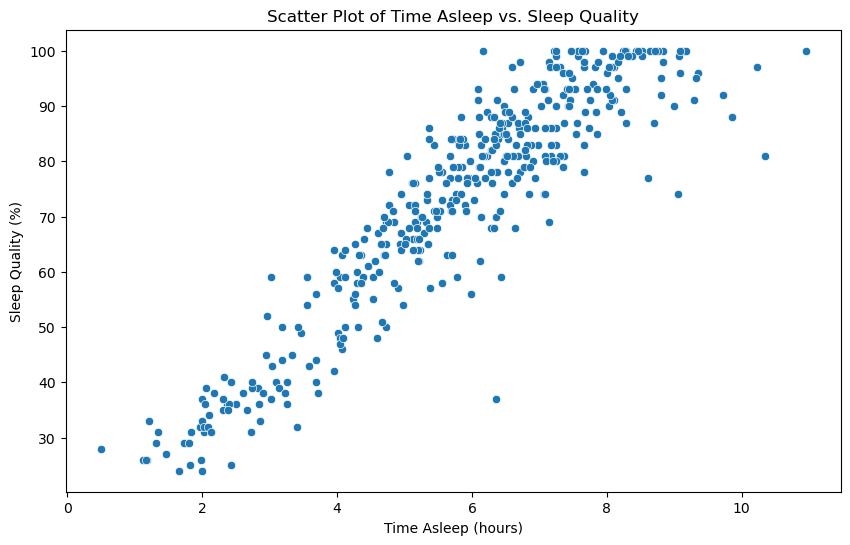

In [238]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time asleep (hours)', y='Sleep Quality', data=df_no_zeros)
plt.title('Scatter Plot of Time Asleep vs. Sleep Quality')
plt.xlabel('Time Asleep (hours)')
plt.ylabel('Sleep Quality (%)')
plt.show()

We can observe a pretty significant positive linear relationship compared to the time asleep vs the sleep quality metric within my sleep data. To find out the accurate correlation I will calculate the correlation coefficient.

In [239]:
# Calculate the correlation coefficient
correlation = df_no_zeros['Time asleep (hours)'].corr(df_no_zeros['Sleep Quality'])
print(f'Correlation between Time Asleep and Sleep Quality: {correlation}')

Correlation between Time Asleep and Sleep Quality: 0.9198182237185264


As suspected the correlation between time asleep and sleep quality amounted to a staggering 0.9198 which is a very significant statistics. However I could see that time asleep doesn't necessarily equate to my time in bed from the exploration done above. So I wanted to see the relationship between the time in bed with the sleep quality as well as the relationship amongst my time asleep and time in bed.

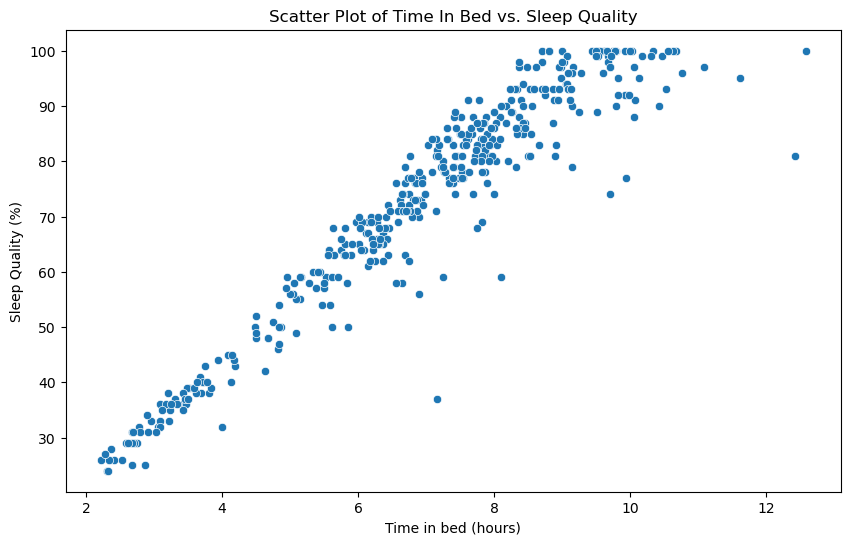

In [240]:
# Scatter plot to visualize the relationship between time in bed and sleep quality 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time in bed (hours)', y='Sleep Quality', data=df_no_zeros)
plt.title('Scatter Plot of Time In Bed vs. Sleep Quality')
plt.xlabel('Time in bed (hours)')
plt.ylabel('Sleep Quality (%)')
plt.show()

As suspected more time in bed was needed for the same amount of sleep quality. The time asleep measures when I was in a rem sleep hence getting a restful sleep. However this doesn't happen right away as I am a very light sleeper and require some time to fall asleep, even hours for some nights. Knowing that I need more time in the bed for my time asleep I'll further examine the relationship between these two parameters. 

                             OLS Regression Results                            
Dep. Variable:     Time asleep (hours)   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.942
Method:                  Least Squares   F-statistic:                     6523.
Date:                 Mon, 05 Aug 2024   Prob (F-statistic):          3.51e-250
Time:                         21:37:36   Log-Likelihood:                -271.75
No. Observations:                  403   AIC:                             547.5
Df Residuals:                      401   BIC:                             555.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -

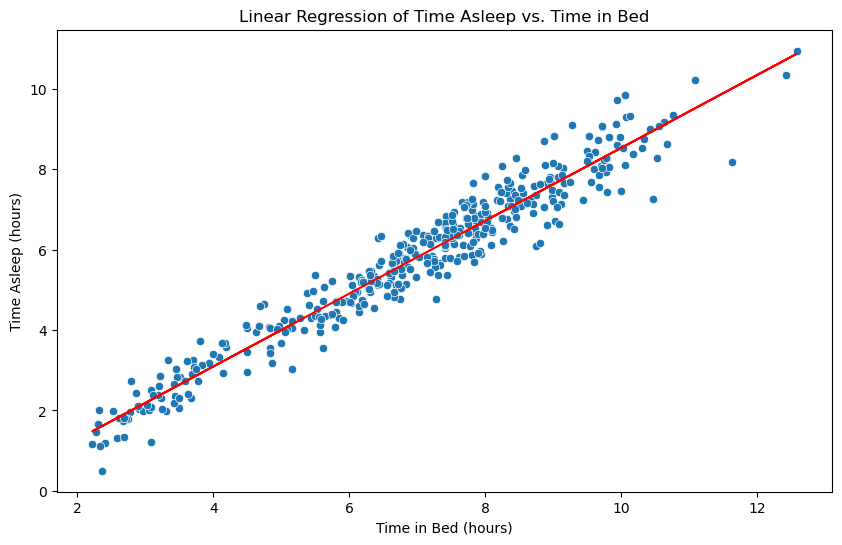

In [241]:
# Prepare the data for regression
X = df_no_zeros['Time in bed (hours)']
y = df_no_zeros['Time asleep (hours)']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time in bed (hours)', y='Time asleep (hours)', data=df_no_zeros)
plt.plot(df_no_zeros['Time in bed (hours)'], model.predict(X), color='red')
plt.title('Linear Regression of Time Asleep vs. Time in Bed')
plt.xlabel('Time in Bed (hours)')
plt.ylabel('Time Asleep (hours)')
plt.show()

As evident by the very high R squared and adjusted R squared value as well as the t value and the p signficance test we can safely assume that the least squared linear regression line for the time asleep to time in bed equation is

                Time Asleep = 0.9069 x Time in Bed - 0.5338
                
And as evident by the higher correlation coefficient between the three variables we can safely assume that this is a signficant equation. To further my analysis I will be returning to sleep quality and time asleep relation in order to find the linear regression between those two variables to find out how much I should safely allocated to be in bed in order for a good night's rest. 

                            OLS Regression Results                            
Dep. Variable:          Sleep Quality   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2204.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          4.98e-165
Time:                        21:37:36   Log-Likelihood:                -1416.1
No. Observations:                 403   AIC:                             2836.
Df Residuals:                     401   BIC:                             2844.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.7362    

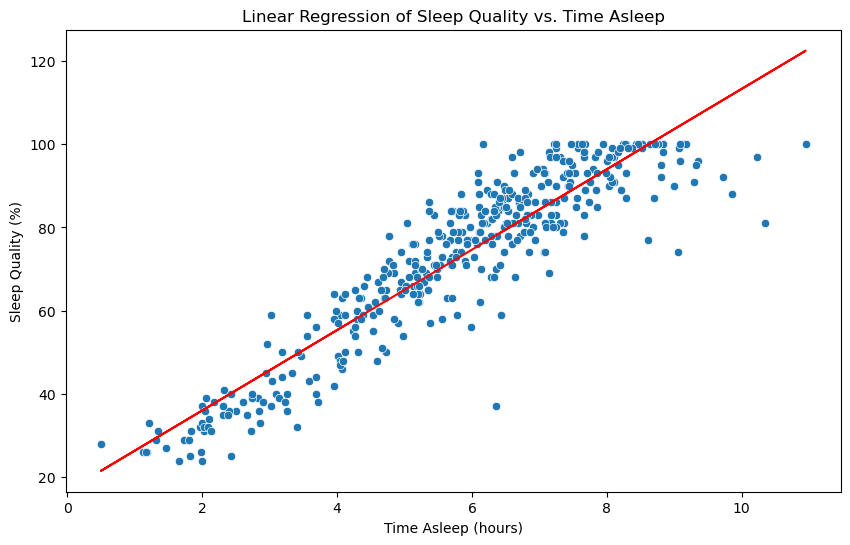

In [242]:
# Prepare the data for regression
X = df_no_zeros['Time asleep (hours)']
y = df_no_zeros['Sleep Quality']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time asleep (hours)', y='Sleep Quality', data=df_no_zeros)
plt.plot(df_no_zeros['Time asleep (hours)'], model.predict(X), color='red')
plt.title('Linear Regression of Sleep Quality vs. Time Asleep')
plt.xlabel('Time Asleep (hours)')
plt.ylabel('Sleep Quality (%)')
plt.show()

This linear regression model shows a lower R squared value compared to the R squared value of time in bed and time asleep however, the t test shows that it is still very significant. From this model we can derive the equation of 

                    Sleep Quality = 9.6524 x Time Asleep + 16.7362 
                    
Knowing this we can finally calculate how much time I can allocate for a restful night of sleep which I found to be at least around 85%. 

                    Sleep Quality = 9.6524 x (0.9069 x Time in Bed - 0.5338) + 16.7362 
                    Time in Bed >= 8.3868
                    
According to this linear regression model I would have to allocate above 8.4 hours, or approximately 8 and a half hours, each night to get a restful night's sleep according to all my previous sleep data. 

After finding this out I became curious on wether or not my physical variables such as steps, movements per hour and heart rate also had an effect on my sleep quality levels as well. As shown by the high correlation with the time asleep and time in bed I decided to calculate the effects of steps, movements per hour and heart rate on sleep quality while holding the time asleep constant throughout this multiple linear regression analysis. 

In [243]:
# Define the independent variables (predictors) and the dependent variable (response)
X = df_no_zeros[['Steps', 'Movements per hour', 'Heart rate (bpm)', 'Time asleep (hours)']]
y = df_no_zeros['Sleep Quality']

# Add a constant to the independent variable matrix (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Sleep Quality   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     719.3
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.22e-180
Time:                        21:37:36   Log-Likelihood:                -1368.5
No. Observations:                 403   AIC:                             2747.
Df Residuals:                     398   BIC:                             2767.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3711    

From this multiple linear regression we can find the equation of : 
            
    Sleep Quality = 0.0003(Steps) - 0.0116(Movements per hour) + 0.0486(Heart rate) + 9.6252(Time Asleep) + 15.3711 
    
We could use this equation to calculate the sleep quality with enough confidence except for the heart rate variable as it is showing a p value of 0.237 which is significantly higher than the other variables as well as showing that that variable is not statistically signficant. 

We could also conclude that the time asleep is the most signficant factor in controlling my sleep quality percentage and how I should prioritize how much time I am spending asleep the most. 

Just out of curiosity I also tried to calculate how much I would have to be in bed for for the minimum 85% sleep quality without taking out the 0 values that I did initially that took out approximately 1400 nights from this analysis. 

                             OLS Regression Results                            
Dep. Variable:     Time asleep (hours)   R-squared:                       0.953
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                 3.786e+04
Date:                 Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                         21:37:36   Log-Likelihood:                -1288.8
No. Observations:                 1882   AIC:                             2582.
Df Residuals:                     1880   BIC:                             2593.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -

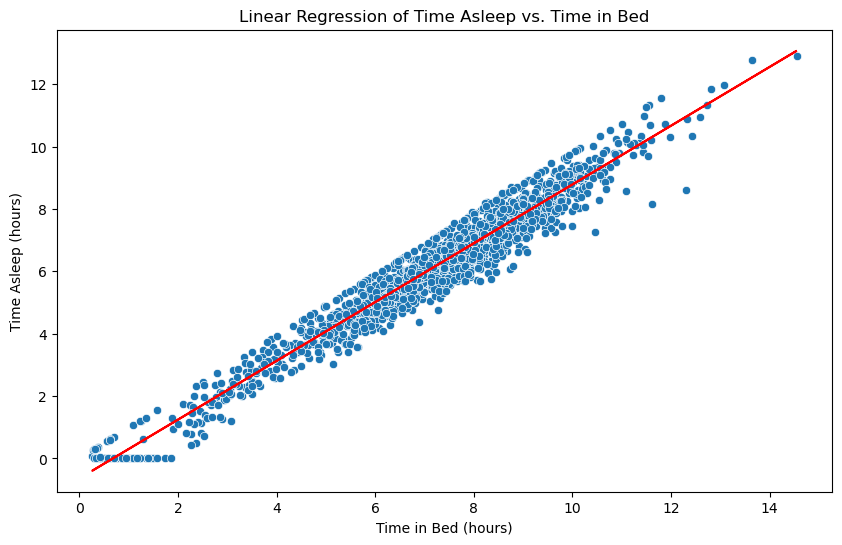

In [244]:
# Prepare the data for regression
X = df['Time in bed (hours)']
y = df['Time asleep (hours)']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time in bed (hours)', y='Time asleep (hours)', data=df)
plt.plot(df['Time in bed (hours)'], model.predict(X), color='red')
plt.title('Linear Regression of Time Asleep vs. Time in Bed')
plt.xlabel('Time in Bed (hours)')
plt.ylabel('Time Asleep (hours)')
plt.show()

In [245]:
# Prepare the data for regression
X = df['Time asleep (hours)']
y = df['Sleep Quality']

# Add a constant to the independent variable matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time asleep (hours)', y='Sleep Quality', data=df)
plt.plot(df['Time asleep (hours)'], model.predict(X), color='red')
plt.title('Linear Regression of Sleep Quality vs. Time Asleep')
plt.xlabel('Time Asleep (hours)')
plt.ylabel('Sleep Quality (%)')
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

From these two models I found that the time in bed also needs to be around 8.63 hours, approximately 8 hours and 40 minutes, in order to achieve a minimum of 85% sleep quality. It is reassuring to find out that the math doesn't shift that drastically while still being statistically signficant but also frightening to confirm my belief that I can't fully function without having to be in bed for 8.5 hours daily. I should try harder to prioritize 8.5 hours in bed sleeping if I want to enjoy all the benefits of a restful night's sleep. 